In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


names = []
for x in range(69):
  names.append(x)

def load_housing_data():
  return pd.read_csv("/content/Citizen_Satisfaction_Survey.csv", names = names, header = 0)


In [0]:
survey = load_housing_data()
survey.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1,2007,23456,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,NaN,NaN,NaN,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Dissatisfied,Dissatisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,They should reduce the traffic flow problems,No,No,No,Yes,No,No,Yes,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Strongly Agree,Agree,NaN,NaN,NaN,NaN,Owns/Has mortgage,12,No,Suffolk,45 to 54,NaN,White (Caucasian),Beyond high school,Yes,"$100,000 to $124,999",Male
1,2,2007,23455,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,NaN,NaN,NaN,Satisfied,Satisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,I think everything is fine,No,No,No,Yes,No,No,Yes,NaN,Agree,Agree,Agree,Strongly Agree,NaN,Strongly Agree,Agree,NaN,NaN,NaN,NaN,Rents,15,No,Chesapeake,45 to 54,NaN,African American,High school or less,No,"$20,000 to $39,999",Male
2,3,2007,23455,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,NaN,NaN,NaN,Satisfied,Dissatisfied,Very Satisfied,Very Satisfied,Dissatisfied,Very Dissatisfied,Dissatisfied,Very Dissatisfied,Dissatisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,The City should create/preserve more green spaces,No,Yes,Yes,Yes,Yes,No,Yes,NaN,Strongly Agree,Agree,Disagree,Strongly Agree,NaN,Strongly Agree,Strongly Agree,NaN,NaN,NaN,NaN,Rents,35,No,Chesapeake,45 to 54,NaN,White (Caucasian),High school or less,No,"Under $20,000",Female
3,4,2007,23452,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,NaN,NaN,NaN,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,They should focus more on regionalism and regi...,No,No,Yes,No,No,Yes,No,NaN,Strongly Agree,Agree,Agree,Strongly Agree,NaN,Strongly Agree,Agree,NaN,NaN,NaN,NaN,Owns/Has mortgage,19,No,Norfolk,45 to 54,NaN,African American,Beyond high school,Yes,"$125,000 or more",Male
4,5,2007,23462,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,NaN,NaN,NaN,Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,I think everything is fine,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Strongly Agree,Agree,Agree,Strongly Agree,NaN,Agree,Agree,NaN,NaN,NaN,NaN,Rents,20,Yes,Virginia Beach (incl. works from home),26 to 34,NaN,African American,Beyond high school,Yes,"$40,000 to $59,999",Female


In [0]:
#the encoders weren't working so i just decided to make my own
def encoder(x, dataset):

  for index in range(len(dataset[x])):
    if dataset[x][index] == "Very Dissatisfied":
      dataset[x][index] = 2
    elif dataset[x][index] == "Dissatisfied":
      dataset[x][index] = 5
    elif dataset[x][index] == "Satisfied":
      dataset[x][index] = 9
    elif dataset[x][index] == "Very Satisfied":
      dataset[x][index] = 14
    else:
      dataset[x][index] = 0
      continue
      
# encoding columns 3-19 
# encoding columns 23-37
def data_clean_up(dataset, columns):
  for item in columns:
    for x in range(item[0],item[1]+1):
      encoder(x, dataset)
      survey[x] = pd.to_numeric(survey[x])



columns = [[3,19],[23,37]]
#decided to convert categorical values before I split the set since we need labels and stuff
data_clean_up(survey, columns)

#copying survey since we're going to need demographic data to do this
survey_demographic = survey
#dropping columns that aren't going to be used
survey = survey.drop([0,1,2,20,21,22,38,46,51,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68], axis=1)
#creating labels
survey["labels"] = survey.sum(axis=1, skipna = True, numeric_only = True)
#since we've created the labels, I'm going to drop those rows
labels = pd.DataFrame(data=survey["labels"])
survey_demographic = survey_demographic.drop([0,1,2,20,21,22,38,46,51,54,55,56,57,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37, 61,63], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/py

In [0]:
survey_demographic.head()

,39,40,41,42,43,44,45,47,48,49,50,52,53,58,59,60,62,64,65,66,67,68
0,No,No,No,Yes,No,No,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Owns/Has mortgage,12,No,45 to 54,White (Caucasian),Beyond high school,Yes,"$100,000 to $124,999",Male
1,No,No,No,Yes,No,No,Yes,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Rents,15,No,45 to 54,African American,High school or less,No,"$20,000 to $39,999",Male
2,No,Yes,Yes,Yes,Yes,No,Yes,Strongly Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Rents,35,No,45 to 54,White (Caucasian),High school or less,No,"Under $20,000",Female
3,No,No,Yes,No,No,Yes,No,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Owns/Has mortgage,19,No,45 to 54,African American,Beyond high school,Yes,"$125,000 or more",Male
4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Strongly Agree,Agree,Agree,Strongly Agree,Agree,Agree,Rents,20,Yes,26 to 34,African American,Beyond high school,Yes,"$40,000 to $59,999",Female


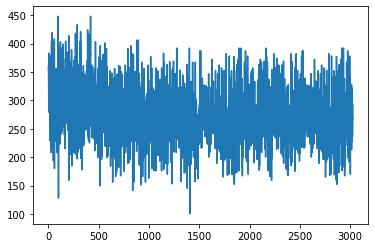

In [0]:
import matplotlib.pyplot as plt 

plt.plot(labels)

In [0]:
import math
print(np.mean(labels))
labels.describe()


labels    273.11856
dtype: float64


,labels
count,3028.000000
mean,273.118560
std,45.723218
min,100.000000
25%,244.000000
50%,268.000000
75%,299.000000
max,448.000000


In [0]:
labels2 = labels.values.tolist()

for x in range(len(labels2)):
  if labels2[x][0] <= 244:
    labels2[x][0] = 1
  elif labels2[x][0]  <= 268:
    labels2[x][0]  = 2
  elif labels2[x][0]  <= 299:
    labels2[x][0]   = 3
  else:
    labels2[x][0]  = 4

In [0]:
df = pd.DataFrame(labels2) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 1 columns):
0    3028 non-null int64
dtypes: int64(1)
memory usage: 23.8 KB


In [0]:
print(df[0].value_counts())

1    784
4    753
3    748
2    743
Name: 0, dtype: int64


In [0]:
print(labels)

      labels
0        360
1        350
2        333
3        314
4        383
...      ...
3023     282
3024     236
3025     268
3026     267
3027     292

[3028 rows x 1 columns]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(survey_demographic, labels2, test_size=0.20, random_state=42)

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cat_encoder = OneHotEncoder(sparse = False)
def process(dataset):
  p59 = pd.DataFrame(data=dataset[59])
  p59 = std_scaler.fit_transform(p59)
  dataset = dataset.drop(59, axis = 1)
  dataset = cat_encoder.fit_transform(dataset)
  df = pd.DataFrame(dataset)
  df[85] = p59
  return df






In [0]:
x_train_processed = process(x_train)
x_test_pro = process(x_test)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train_processed, y_train)
lin_pred = lin_reg.predict(x_train_processed)
lin_mse = mean_squared_error(y_train, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8917140275194553

In [0]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, x_train_processed, y_train,
                                scoring="neg_mean_squared_error", cv=5)
lin_rmse = np.sqrt(-lin_scores)
print(lin_rmse)

[9.19915988e-01 9.12225622e-01 9.29600413e-01 9.48930151e-01
 2.54529374e+10]


In [0]:
lin_pred_test = lin_reg.predict(x_test_pro)
lin_mse2 = mean_squared_error(y_test, lin_pred_test)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

0.913957678319829

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

ovo_poly5 = SVC(kernel = "poly")
ovo_poly5.fit(x_train_processed, y_train)
y_pred = ovo_poly5.predict(x_test_pro)

accuracy_score(y_test, y_pred)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3102310231023102

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

ovo_poly5 = SVC(kernel = "rbf")
ovo_poly5.fit(x_train_processed, y_train)
y_pred = ovo_poly5.predict(x_test_pro)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4240924092409241

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

ovo_poly5 = SVC(kernel = "linear")
ovo_poly5.fit(x_train_processed, y_train)
y_pred = ovo_poly5.predict(x_test_pro)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41914191419141916

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform as sp_uniform

model_to_set = SVC()

parameters = {
    "coef0": sp_uniform(scale=5),
    "kernel": ["rbf"],
    "degree":randint(low = 1, high = 5),
    "gamma": sp_uniform(scale=3),
    "C" : randint(low = 1, high = 5)
}

model_tunning = RandomizedSearchCV(model_to_set, param_distributions=parameters,
                             cv = 3, n_iter = 50, scoring="accuracy", random_state=42)

model_tunning.fit(x_train_processed, y_train)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.5260115606936416
{'C': 2, 'coef0': 3.6363599792821044, 'degree': 3, 'gamma': 0.2654775061557585, 'kernel': 'rbf'}


In [0]:
#0.5260115606936416
#{'C': 2, 'coef0': 3.6363599792821044, 'degree': 3, 'gamma': 0.2654775061557585, 'kernel': 'rbf'}
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_to_set2 = SVC(kernel="poly")

parameters = {
    "C": [2.25,2.5,2.75],
    "coef0" :[2.8, 3.2],
    "kernel": ["rbf"],
    "degree":[2,3,4],
    "gamma": [.24,.26,.28]
}

model_tunning3 = GridSearchCV(model_to_set2, param_grid=parameters,
                             scoring="accuracy")

model_tunning3.fit(x_train_processed, y_train)

print(model_tunning3.best_score_)
print(model_tunning3.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.5289017341040463
{'C': 2.5, 'coef0': 2.8, 'degree': 2, 'gamma': 0.26, 'kernel': 'rbf'}


In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform as sp_uniform

model_to_set = SVC()

parameters = {
    "coef0": sp_uniform(scale=5),
    "kernel": ["poly"],
    "degree":randint(low = 1, high = 5),
    "gamma": sp_uniform(scale=3),
    "C" : randint(low = 1, high = 5)
}

model_tunning = RandomizedSearchCV(model_to_set, param_distributions=parameters,
                             cv = 3, n_iter = 50, scoring="accuracy", random_state=42)

model_tunning.fit(x_train_processed, y_train)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.4797687861271676
{'C': 4, 'coef0': 2.8163778598819182, 'degree': 4, 'gamma': 2.722699421778279, 'kernel': 'poly'}


In [0]:
#0.4797687861271676
#{'C': 4, 'coef0': 2.8163778598819182, 'degree': 4, 'gamma': 2.722699421778279, 'kernel': 'poly'}
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_to_set2 = SVC(kernel="poly")

parameters = {
    "C": [3,4,5],
    "coef0" :[2.8],
    "kernel": ["poly"],
    "degree":[3,4,5],
    "gamma": [2.5,2.7,2.9]
}

model_tunning3 = GridSearchCV(model_to_set2, param_grid=parameters,
                             scoring="accuracy")

model_tunning3.fit(x_train_processed, y_train)

print(model_tunning3.best_score_)
print(model_tunning3.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.49050371593724196
{'C': 3, 'coef0': 2.8, 'degree': 5, 'gamma': 2.7, 'kernel': 'poly'}


In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform as sp_uniform

model_to_set = SVC()

parameters = {
    "coef0": sp_uniform(scale=5),
    "kernel": ["linear"],
    "degree":randint(low = 1, high = 5),
    "gamma": sp_uniform(scale=3),
    "C" : randint(low = 1, high = 5)
}

model_tunning = RandomizedSearchCV(model_to_set, param_distributions=parameters,
                             cv = 3, n_iter = 50, scoring="accuracy", random_state=42)

model_tunning.fit(x_train_processed, y_train)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.43724194880264244
{'C': 1, 'coef0': 2.984250789732435, 'degree': 2, 'gamma': 0.46798356100860794, 'kernel': 'linear'}


In [0]:
#0.43724194880264244
#{'C': 1, 'coef0': 2.984250789732435, 'degree': 2, 'gamma': 0.46798356100860794, 'kernel': 'linear'}
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_to_set2 = SVC(kernel="poly")

parameters = {
    "C": [.8,1,1.2],
    "coef0" :[2.8,2.95,3.1],
    "kernel": ["linear"],
    "gamma": [.2,.45,.7]
}

model_tunning3 = GridSearchCV(model_to_set2, param_grid=parameters,
                             scoring="accuracy")

model_tunning3.fit(x_train_processed, y_train)

print(model_tunning3.best_score_)
print(model_tunning3.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.44095788604459124
{'C': 0.8, 'coef0': 2.8, 'gamma': 0.2, 'kernel': 'linear'}
